# Data Visualization Day 1
## Loading files

In [1]:
wordfile = open("english2.txt")
words = [w.strip() for w in wordfile.readlines()]
wordfile.close()

In [2]:
words[:20]

['aardvark',
 'aardvarks',
 'aardwolf',
 'aardwolves',
 'ab',
 'aba',
 'abaca',
 'abacas',
 'abaci',
 'aback',
 'abacterial',
 'abacus',
 'abacuses',
 'abaft',
 'abalone',
 'abalones',
 'abandon',
 'abandoned',
 'abandonee',
 'abandoner']

## Pandas

To analyze data in this course, we will commonly use the Pandas library in python.

https://pandas.pydata.org/

In [3]:
import pandas as pd

word_data = pd.DataFrame(words, columns=["word"])

In [4]:
word_data

,word
0,aardvark
1,aardvarks
2,aardwolf
3,aardwolves
4,ab
...,...
98216,zwitterionic
98217,zwitterions
98218,zygote
98219,zygotes


In [5]:
len(word_data)

98221

In [6]:
word_data.tail(3)

,word
98218,zygote
98219,zygotes
98220,zymurgy


In [7]:
word_data.head(4)

,word
0,aardvark
1,aardvarks
2,aardwolf
3,aardwolves


## Manipulating the data frames

We can use some of the built-in functionality of the data frame to answer questions and summarize our word data.

* How many words end in 'ing'?
* How many words are [abecedarian](https://www.merriam-webster.com/dictionary/abecedarian)?
* What is the longest abecedarian word?
* What is the longest word in the dictionary?

In [8]:
word_data[word_data["word"].str.endswith("ing")]

,word
20,abandoning
35,abashing
37,abasing
44,abating
63,abbreviating
...,...
98127,zigzagging
98135,zing
98146,zipping
98179,zoning


How did that work? The inner part found a list of True/False values, and then used that to select the rows where the value in the list was True. 

In [9]:
the_ings = word_data["word"].str.endswith("ing")

In [10]:
word_data[the_ings]

,word
20,abandoning
35,abashing
37,abasing
44,abating
63,abbreviating
...,...
98127,zigzagging
98135,zing
98146,zipping
98179,zoning


In [11]:
def abecedarian(s):
    s = s.lower()
    for i in range(len(s) - 1):
        if s[i] > s[i + 1]:
            return False
    return True

In [12]:
abcs = [abecedarian(s) for s in word_data["word"]]

In [13]:
abcs[:20]

[False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [14]:
abc_words = word_data[abcs]

In [15]:
longest = abc_words["word"].str.len().max()

In [16]:
abc_words[abc_words["word"].str.len() == 7]

,word
8587,billowy


In [17]:
longest = word_data["word"].str.len().max()

In [18]:
word_data[word_data["word"].str.len() == longest]

,word
3711,antidisestablishmentarianism


## Letter Frequency

We can use a dictionary to count the frequency of the letters in the words, then store this in a data frame.

In [19]:
d = {}
for w in words:
    for c in w:
        d[c] = d.get(c, 0) + 1

In [20]:
d

{'a': 69209,
 'r': 64183,
 'd': 30050,
 'v': 9252,
 'k': 6134,
 's': 68267,
 'w': 5938,
 'o': 57655,
 'l': 51765,
 'f': 10796,
 'e': 99676,
 'b': 16827,
 'c': 37835,
 'i': 82878,
 't': 62494,
 'u': 29387,
 'n': 61380,
 'g': 23163,
 'm': 25443,
 'h': 19260,
 'y': 17514,
 'x': 2555,
 'j': 1260,
 'z': 7321,
 'p': 26144,
 'q': 1526}

In [21]:
letter_freq = pd.DataFrame(list(zip(d.keys(), d.values())),
                          columns = ["letter", "count"])

In [22]:
letter_freq

,letter,count
0,a,69209
1,r,64183
2,d,30050
3,v,9252
4,k,6134
5,s,68267
6,w,5938
7,o,57655
8,l,51765
9,f,10796


Here is how we can sort the table by a column, to find the most frequent letter

In [23]:
letter_freq.sort_values(['count'], ascending = False)

,letter,count
10,e,99676
13,i,82878
0,a,69209
5,s,68267
1,r,64183
14,t,62494
16,n,61380
7,o,57655
8,l,51765
12,c,37835


And we can divide every element in the column the total number of letters to calculate the relative frequency.

In [24]:
letter_freq['count'] /= letter_freq['count'].sum()

In [25]:
letter_freq

,letter,count
0,a,0.077946
1,r,0.072285
2,d,0.033843
3,v,0.010420
4,k,0.006908
5,s,0.076885
6,w,0.006688
7,o,0.064933
8,l,0.058300
9,f,0.012159


## Plotting with plotnine and ggplot

Now we need to visualize our data. We'll be using the plotnine library, which uses a grammar of graphics methodology for creating graphs. 

* https://plotnine.readthedocs.io/en/stable/
* https://byrneslab.net/classes/biol607/readings/wickham_layered-grammar.pdf

In [26]:
from plotnine import *

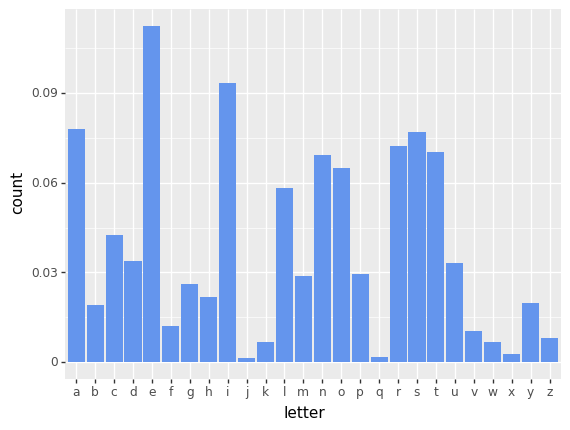

<ggplot: (7556972697)>

In [27]:
ggplot(letter_freq, aes(x = "letter", y = "count")) + \
geom_col(fill="cornflowerblue")